## Observations and Insights 

In [20]:
# Observations and insights
# The tumor volumn is higher in heavy using capolmulin
# The tumor volumn shows that capomulin and ramicane are best for lowering the volumne.
# Tumor volume increases over time
# Capomulin's best results occure in the first five seconds
# Both capomulin and ramicane are the best treatments in this test.  
#
#
#



# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from pprint import pprint
from functools import reduce
import numpy as np
from sklearn import datasets
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_data = mouse_metadata.merge(study_results, on = "Mouse ID")

# Display the data table for preview
merged_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [21]:
# Checking the number of mice. (Use nunique to return unique element.)
mice_count = merged_data["Mouse ID"].nunique()
mice_count

249

In [22]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dups_df = merged_data.loc[merged_data.duplicated(subset = ["Mouse ID","Timepoint"],keep = False)== True]
dups_df = dups_df["Mouse ID"].drop_duplicates()
dups_df = pd.DataFrame(dups_df)
dups_df


,Mouse ID
908,g989


In [27]:
# Optional: Get all the data for the duplicate mouse ID. 
dupes_df_keep = pd.DataFrame(dups_df)
duplicated = dupes_df_keep.merge(merged_data, on = "Mouse ID")
duplicated

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,g989,Propriva,Female,21,26,0,45.000000,0
1,g989,Propriva,Female,21,26,0,45.000000,0
2,g989,Propriva,Female,21,26,5,48.786801,0
3,g989,Propriva,Female,21,26,5,47.570392,0
4,g989,Propriva,Female,21,26,10,51.745156,0
5,g989,Propriva,Female,21,26,10,49.880528,0
6,g989,Propriva,Female,21,26,15,51.325852,1
7,g989,Propriva,Female,21,26,15,53.442020,0
8,g989,Propriva,Female,21,26,20,55.326122,1
9,g989,Propriva,Female,21,26,20,54.657650,1


In [29]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# The isin() function is used to check each element in the DataFrame is contained in values or not. 
cleaned_data = merged_data.copy()
cleaned_data = cleaned_data.loc[~(cleaned_data["Mouse ID"].isin(dups_df["Mouse ID"]))]
cleaned_data


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [30]:
# Checking the number of mice in the clean DataFrame.
mice_count_non_dupes = clean_data["Mouse ID"].nunique()
mice_count_non_dupes

249

## Summary Statistics

In [31]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Within the summary, lamda is used:  A lambda function is a small function containing a single expression. 

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
mean = round(clean_data.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"],3)
mean = mean.reset_index()
mean = mean.rename(columns={"Tumor Volume (mme)":"Mean"})

median = round(clean_data.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"],3)
median = mean.reset_index()
median = mean.rename(columns={"Tumor Volume (mme)":"Mean"})

# mean, median, variance, standard deviation, and SEM of the tumor volume. 
var = round(clean_data.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"],3)
var = mean.reset_index()
var = mean.rename(columns={"Tumor Volume (mme)":"Mean"})

std = round(clean_data.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"],3)
std = mean.reset_index()
std = mean.rename(columns={"Tumor Volume (mme)":"Mean"})

sem = round(clean_data.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"],3)
sem = mean.reset_index()
sem = mean.rename(columns={"Tumor Volume (mme)":"Mean"})

dataframe =[mean,median,var,std,sem]

summary_df = reduce(lambda  left,right: pd.merge(left,right,on=['Drug Regimen'], how='inner'), dataframe)
summary_df

# Assemble the resulting series into a single summary dataframe.



,Drug Regimen,Tumor Volume (mm3)_x,Tumor Volume (mm3)_y,Tumor Volume (mm3)_x,Tumor Volume (mm3)_y,Tumor Volume (mm3)
0,Capomulin,40.676,40.676,40.676,40.676,40.676
1,Ceftamin,52.591,52.591,52.591,52.591,52.591
2,Infubinol,52.885,52.885,52.885,52.885,52.885
3,Ketapril,55.236,55.236,55.236,55.236,55.236
4,Naftisol,54.332,54.332,54.332,54.332,54.332
5,Placebo,54.034,54.034,54.034,54.034,54.034
6,Propriva,52.323,52.323,52.323,52.323,52.323
7,Ramicane,40.217,40.217,40.217,40.217,40.217
8,Stelasyn,54.233,54.233,54.233,54.233,54.233
9,Zoniferol,53.237,53.237,53.237,53.237,53.237


In [32]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
clean_data.groupby(["Drug Regimen"]).agg({"Tumor Volume (mm3)":['mean','median','var','std','sem']})


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

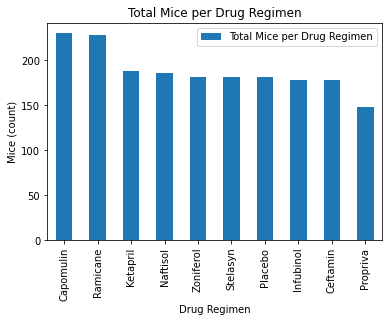

In [33]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
plt.title("Total Mice per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Mice (count)")
mouseplt =cleaned_data["Drug Regimen"].value_counts()

mouseplt.plot(kind="bar",x="Drug Regimen", y="Value Counts",label="Total Mice per Drug Regimen")
plt.legend()
plt.show()

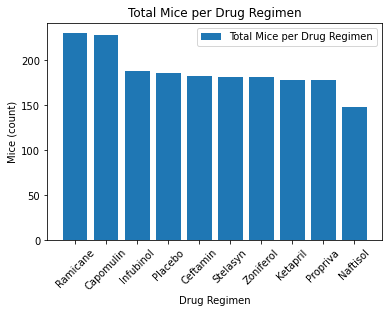

In [34]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot
myplt = clean_data["Drug Regimen"].unique()
myplt
plt.title("Total Mice per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Mice (count)")
plt.bar(myplt, height=(mouseplt), label="Total Mice per Drug Regimen")
plt.xticks(rotation=45)
plt.legend()
plt.show()


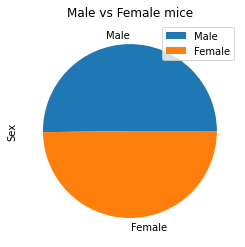

In [35]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
male_vs_female = clean_data.drop_duplicates(subset=["Mouse ID"])
male_vs_female = male_vs_female["Sex"].value_counts()
plt.title("Male vs Female mice")
male_vs_female.plot.pie()
plt.legend()
plt.show()


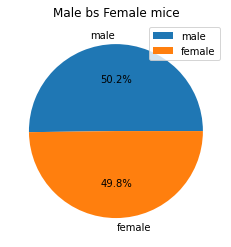

In [36]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = 'male','female'
sizes = male_vs_female

fig1,ax1 = plt.subplots()
plt.title("Male bs Female mice")
ax1.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.legend()
plt.show()


## Quartiles, Outliers and Boxplots

In [38]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
sorted_df = cleaned_data.sort_values(by='Timepoint', ascending=False)
sorted_df = sorted_df.drop_duplicates(subset=["Mouse ID"])
druglist = ["Capomulin", "Ramicane", "Infubinol","Ceftamin"]

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
sorted_df = sorted_df.loc[(sorted_df["Drug Regimen"].isin(druglist))]
sorted_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
360,g316,Capomulin,Female,22,22,45,40.159220,2
124,y793,Capomulin,Male,17,17,45,31.896238,2
1855,y865,Ceftamin,Male,23,26,45,64.729837,3
350,v923,Capomulin,Female,19,21,45,40.658124,2
1379,p438,Ceftamin,Female,11,26,45,61.433892,1
...,...,...,...,...,...,...,...,...
449,w678,Ramicane,Female,5,24,5,43.166373,0
1743,x226,Ceftamin,Male,23,28,0,45.000000,0
594,b447,Ceftamin,Male,2,30,0,45.000000,0
1583,u153,Ceftamin,Female,11,25,0,45.000000,0


In [40]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = sorted_df["Drug Regimen"].unique().tolist()

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
for i, treatment in enumerate(treatments):
    filtered_df = sorted_df.loc[(sorted_df["Drug Regimen"] == treatment)]
    tumor_vol.append(filtered_df[["Mouse ID","Drug Regimen",'Tumor Volume (mm3)']])
    Q1 = filtered_df['Tumor Volume (mm3)'].quantile(0.25)
    Q3 = filtered_df['Tumor Volume (mm3)'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = round(Q1 - (1.5 * IQR),4)
    upper_bound = round(Q3 + (1.5 * IQR),4)
    print(f"Values below {lower_bound} and above {upper_bound} would be considered outliers")

Values below 20.7046 and above 51.832 would be considered outliers
Values below 25.3554 and above 87.6665 would be considered outliers
Values below 17.9127 and above 54.3068 would be considered outliers
Values below 36.8329 and above 82.7414 would be considered outliers


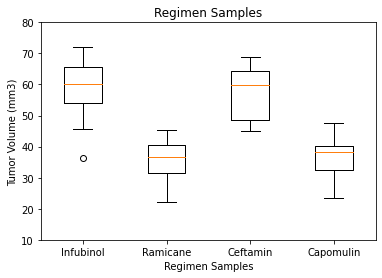

In [41]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
values_per_reg = pd.DataFrame(tumor_vol[0])
values_per_reg = values_per_reg.append(pd.DataFrame(tumor_vol[1]))
values_per_reg = values_per_reg.append(pd.DataFrame(tumor_vol[2]))
values_per_reg = values_per_reg.append(pd.DataFrame(tumor_vol[3]))

#Get a dataframe with only tumor volumne and drug regimen
drug_vs_tvol = values_per_reg.reset_index() 
drug_vs_tvol = values_per_reg[["Drug Regimen","Tumor Volume (mm3)"]] 


#Seperate drugs by regimen into series
inf_drug = drug_vs_tvol.loc[drug_vs_tvol["Drug Regimen"] == "Infubinol"]
inf_drug = inf_drug.reset_index()
inf_drug_series = inf_drug["Tumor Volume (mm3)"]
inf_drug_series = pd.Series(inf_drug_series)

rami_drug = drug_vs_tvol.loc[drug_vs_tvol["Drug Regimen"] == "Ramicane"]
rami_drug = rami_drug.reset_index()
rami_drug_series = rami_drug["Tumor Volume (mm3)"]
rami_drug_series = pd.Series(rami_drug_series)

ceft_drug = drug_vs_tvol.loc[drug_vs_tvol["Drug Regimen"] == "Ceftamin"]
ceft_drug = ceft_drug.reset_index()
ceft_drug_series = ceft_drug["Tumor Volume (mm3)"]
ceft_drug_series = pd.Series(ceft_drug_series)

capo_drug = drug_vs_tvol.loc[drug_vs_tvol["Drug Regimen"] == "Capomulin"]
capo_drug = capo_drug.reset_index()
capo_drug_series = capo_drug["Tumor Volume (mm3)"]
capo_drug_series = pd.Series(capo_drug_series)

#plot all series on same plot
data = [inf_drug_series,rami_drug_series,ceft_drug_series,capo_drug_series]
fig7, ax7 = plt.subplots()
ax7.set_title('Regimen Samples')
plt.xlabel("Regimen Samples")
plt.ylabel("Tumor Volume (mm3)")
plt.ylim(10,80)
ax7.boxplot(data)
plt.xticks([1, 2, 3, 4], ['Infubinol', 'Ramicane', 'Ceftamin','Capomulin'])
plt.show()

## Line and Scatter Plots

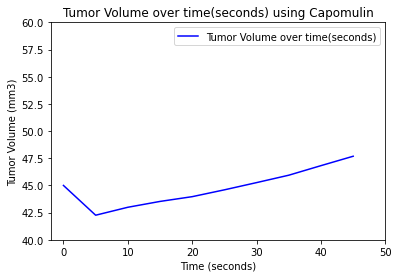

In [42]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capmice = cleaned_data.loc[cleaned_data["Drug Regimen"] == "Capomulin"]
capmouse = cleaned_data.loc[cleaned_data["Mouse ID"] == "i557"] 
plt.title("Tumor Volume over time(seconds) using Capomulin")
plt.xlabel("Time (seconds)")
plt.ylabel("Tumor Volume (mm3)")
plt.ylim(40,60)
plt.xlim(-2,50)
plt.plot(capmouse["Timepoint"], capmouse["Tumor Volume (mm3)"] ,color="blue", label="Tumor Volume over time(seconds)" )
plt.legend()
plt.show()

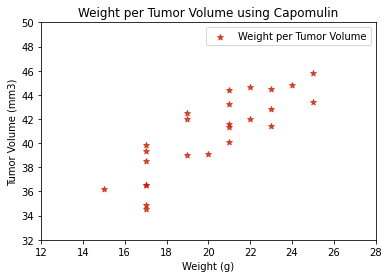

In [47]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
average_tumor_vol = capmice.groupby("Mouse ID").mean()

x_axis = average_tumor_vol["Weight (g)"]
y_axis = average_tumor_vol["Tumor Volume (mm3)"]

plt.title("Weight per Tumor Volume using Capomulin")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.ylim(32,50)
plt.xlim(12,28)

plt.scatter(x_axis, y_axis, marker="*", facecolors="green", edgecolors="red",  alpha=0.75, label="Weight per Tumor Volume")
plt.legend()
plt.plot()
plt.show()

## Correlation and Regression

In [50]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(x_axis, y_axis)
rounded_corr = round(correlation[0],4)
rounded_corr

0.8419

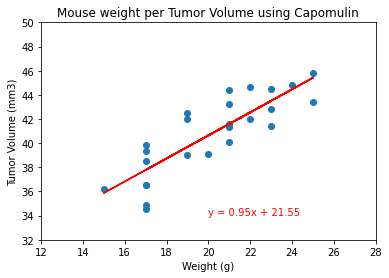

In [51]:
#linear regression model for mouse weight and average tumor volume for the Capomulin regimen
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.title("Mouse weight per Tumor Volume using Capomulin")

plt.annotate(line_eq,(20,34),fontsize=10,color="red")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.ylim(32,50)
plt.xlim(12,28)
plt.show()